In [5]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def FFT(signal):
    N = len(signal)
    if N <= 1:
        return signal
    even = FFT(signal[0::2])
    odd = FFT(signal[1::2])
    spectra = np.zeros(N, dtype = "complex")

    for k in range(N//2):
        angle = -2*np.pi*k/N
        factor = odd[k]*complex(np.cos(angle), np.sin(angle))
        spectra[k] = even[k] + factor
        spectra[k+(N//2)] = even[k] - factor

    return spectra

def FFTFrec(N, d):
    frecuencies = []

    for i in range(N):
        if i <= N//2:
            freq = i/(N*d)
            
        else:
            freq = (i - N)/(N*d)

        frecuencies.append(freq)

    return frecuencies

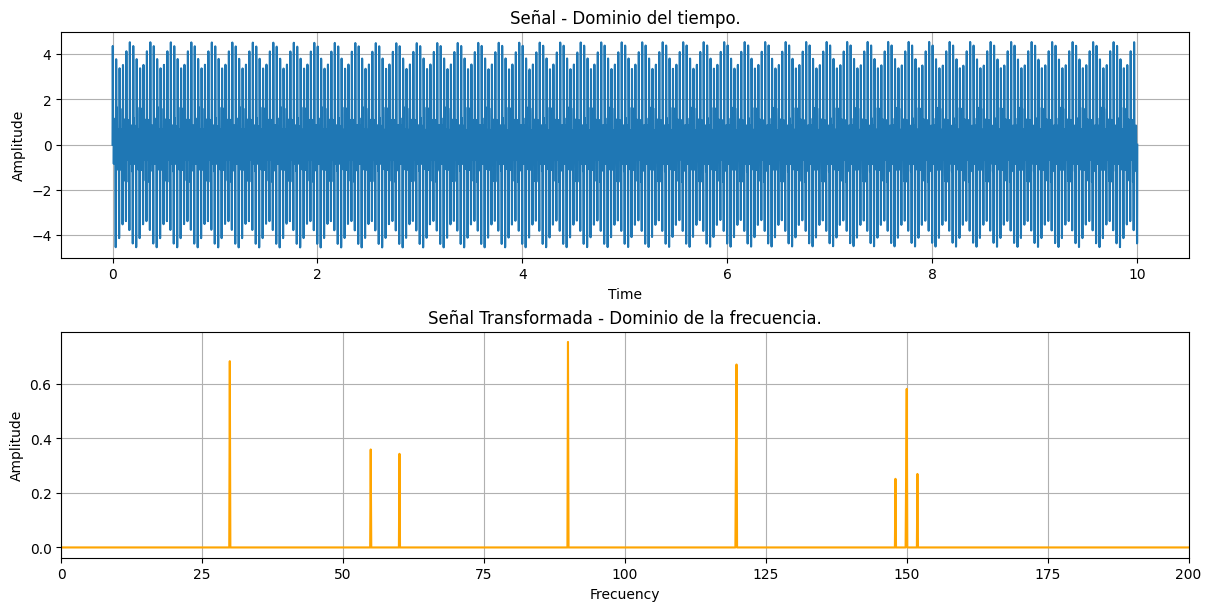

frecuencia:29.90 Hz, Magnitud:0.68
frecuencia:54.90 Hz, Magnitud:0.36
frecuencia:60.00 Hz, Magnitud:0.34
frecuencia:89.90 Hz, Magnitud:0.75
frecuencia:119.70 Hz, Magnitud:0.36
frecuencia:119.80 Hz, Magnitud:0.67
frecuencia:148.00 Hz, Magnitud:0.25
frecuencia:149.90 Hz, Magnitud:0.30
frecuencia:150.00 Hz, Magnitud:0.58
frecuencia:151.90 Hz, Magnitud:0.27


In [2]:
sampleRate = 2000
duration = 10
workingFreq = 30
armonic = [workingFreq*n for n in range (1,6)]
weirdFreq = 55

n = int(duration * sampleRate)

t = np.linspace(0, duration, n)

signal = sum(np.sin(2*np.pi*f*t) for f in armonic)
signal += 0.6*np.sin(2*np.pi*weirdFreq*t)

N = len(signal)

results = FFT(signal)
amp = [abs(x)*(2/len(results)) for x in results]
amp = amp[:N//2]
frecuencies = FFTFrec(N, d=1/sampleRate)[:N//2]

umbral = 0.25
filterAmp = [m if m > umbral else 0 for m in amp]
dominatFreq = [(frecuencies[i], amp[i]) for i in range(len(amp)) if amp[i] > umbral]

fig, ax = plt.subplots(2, 1, figsize = (12, 6), layout = "constrained")

ax[0].plot(t, signal)
ax[0].set_title("Señal - Dominio del tiempo.")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")
ax[0].grid()
ax[1].plot(frecuencies, filterAmp, color="orange")
ax[1].set_title("Señal Transformada - Dominio de la frecuencia.")
ax[1].set_xlabel("Frecuency")
ax[1].set_ylabel("Amplitude")
ax[1].set_xlim([0,200])
ax[1].grid()

plt.show()

for f, a in dominatFreq:
    print(f"frecuencia:{f:.2f} Hz, Magnitud:{a:.2f}")

In [4]:
signal

array([ 0.00000000e+00,  1.48582440e+00,  2.78825511e+00, ...,
       -2.78825511e+00, -1.48582440e+00, -1.54964886e-12], shape=(20000,))

/tmp/ipykernel_7753/2361091294.py:1: WavFileWarning: Reached EOF prematurely; finished at 4140 bytes, expected 8236 bytes from header.
  SampleRate, audioData = wavfile.read("/home/EhwazM/Downloads/scopegen_data3.wav")


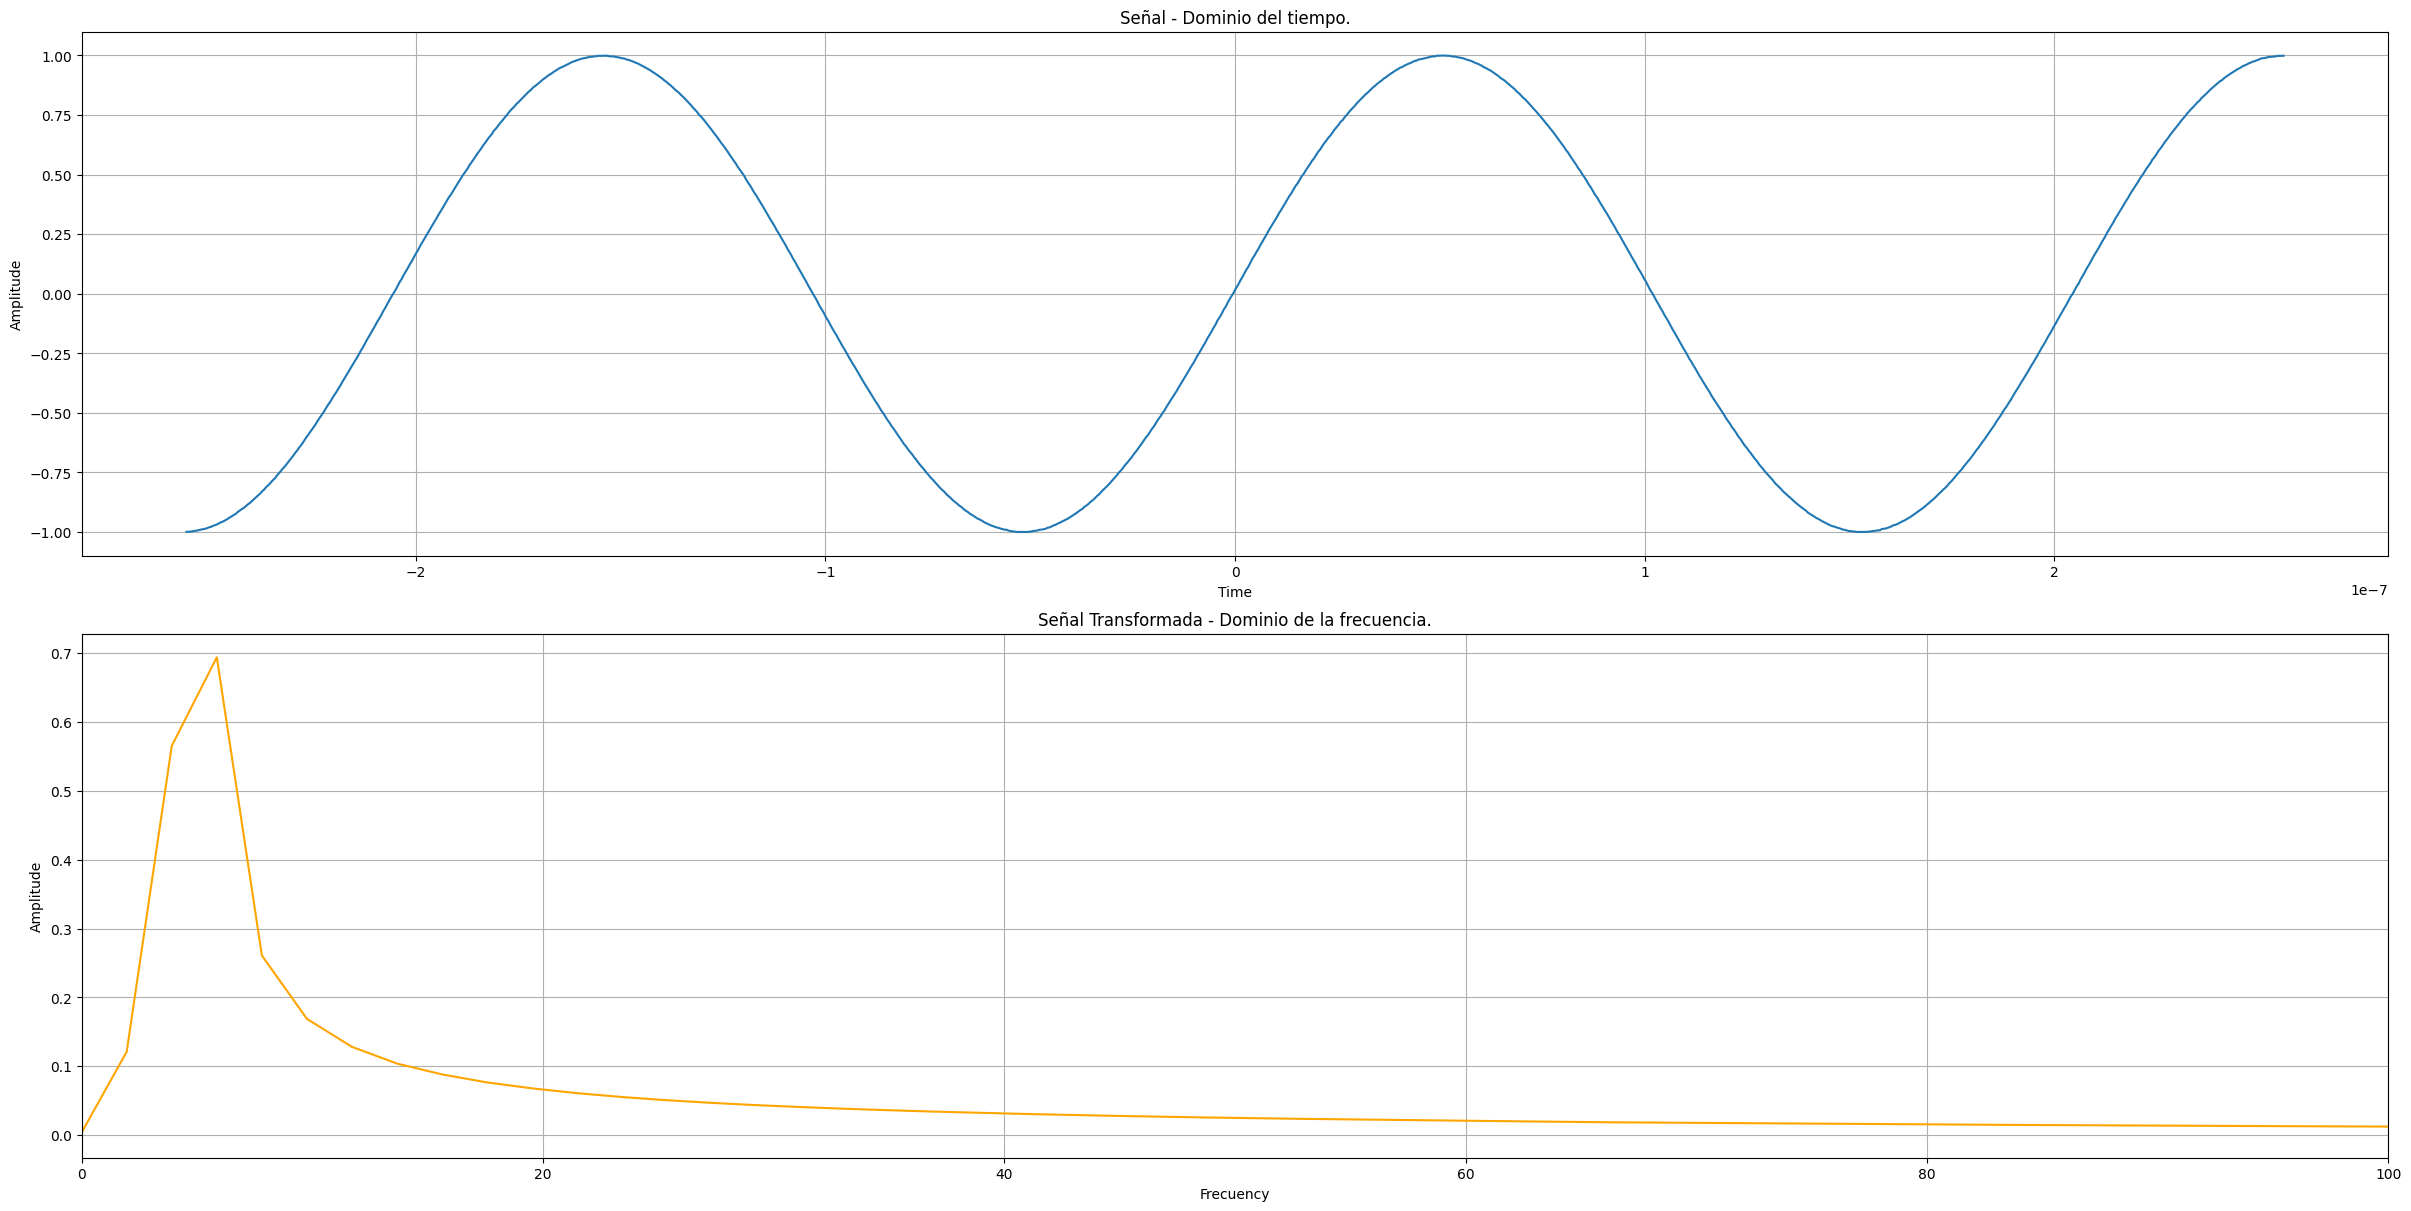

La frecuencia dominate es:5.86 Hz
frecuencia:0.00 Hz, Magnitud:0.00
frecuencia:1.95 Hz, Magnitud:0.12
frecuencia:3.91 Hz, Magnitud:0.57
frecuencia:5.86 Hz, Magnitud:0.69
frecuencia:7.81 Hz, Magnitud:0.26
frecuencia:9.77 Hz, Magnitud:0.17
frecuencia:11.72 Hz, Magnitud:0.13
frecuencia:13.67 Hz, Magnitud:0.10
frecuencia:15.62 Hz, Magnitud:0.09
frecuencia:17.58 Hz, Magnitud:0.08
frecuencia:19.53 Hz, Magnitud:0.07
frecuencia:21.48 Hz, Magnitud:0.06
frecuencia:23.44 Hz, Magnitud:0.06
frecuencia:25.39 Hz, Magnitud:0.05
frecuencia:27.34 Hz, Magnitud:0.05
frecuencia:29.30 Hz, Magnitud:0.04
frecuencia:31.25 Hz, Magnitud:0.04
frecuencia:33.20 Hz, Magnitud:0.04
frecuencia:35.16 Hz, Magnitud:0.04
frecuencia:37.11 Hz, Magnitud:0.03
frecuencia:39.06 Hz, Magnitud:0.03
frecuencia:41.02 Hz, Magnitud:0.03
frecuencia:42.97 Hz, Magnitud:0.03
frecuencia:44.92 Hz, Magnitud:0.03
frecuencia:46.88 Hz, Magnitud:0.03
frecuencia:48.83 Hz, Magnitud:0.03
frecuencia:50.78 Hz, Magnitud:0.02
frecuencia:52.73 Hz, Magnit

In [ ]:
SampleRate, audioData = wavfile.read("/home/EhwazM/Downloads/scopegen_data3.wav")

if audioData.ndim > 1:
    audioData = audioData[:,0]

audioData = audioData/np.max(np.abs(audioData))3
n = len(audioData)
d = 1/sampleRate
t = np.linspace(-(n*d)/2, (n*d)/2, n)

results = FFT(audioData)
amp = [abs(x)*(2/len(results)) for x in results]
amp = amp[:n//2]
frecuencies = FFTFrec(n, d=1/sampleRate)[:n//2]

umbral = 0.00
filterAmp = [m if m > umbral else 0 for m in amp]
dominatFreq = [(frecuencies[i], amp[i]) for i in range(len(amp)) if amp[i] > umbral]

fig, ax = plt.subplots(2, 1, figsize = (24, 12), layout = "constrained")

ax[0].plot(t, audioData)
ax[0].set_title("Señal - Dominio del tiempo.")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")
ax[0].grid()
ax[1].plot(frecuencies, filterAmp, color="orange")
ax[1].set_title("Señal Transformada - Dominio de la frecuencia.")
ax[1].set_xlabel("Frecuency")
ax[1].set_ylabel("Amplitude")
ax[1].set_xlim([0,100])
ax[1].grid()

plt.show()

pIndex = np.argmax(amp)
major_frec = frecuencies[pIndex]
print(f"La frecuencia dominate es:{major_frec:.2f} Hz")

for f, a in dominatFreq:
    print(f"frecuencia:{f:.2f} Hz, Magnitud:{a:.2f}")

In [15]:
sampleRate, d, n, n*d

(2000, 5e-10, 1024, 5.12e-07)